
 **students academic performance**

importing necessary packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics as met
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
%matplotlib inline

In [3]:
dataset=pd.read_csv('Student Classification Data.csv')

In [4]:
dataset

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


In [5]:
dataset.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [6]:
dataset.shape

(480, 17)

In [7]:
dataset.info

<bound method DataFrame.info of     gender NationalITy PlaceofBirth       StageID GradeID SectionID  \
0        M          KW       KuwaIT    lowerlevel    G-04         A   
1        M          KW       KuwaIT    lowerlevel    G-04         A   
2        M          KW       KuwaIT    lowerlevel    G-04         A   
3        M          KW       KuwaIT    lowerlevel    G-04         A   
4        M          KW       KuwaIT    lowerlevel    G-04         A   
..     ...         ...          ...           ...     ...       ...   
475      F      Jordan       Jordan  MiddleSchool    G-08         A   
476      F      Jordan       Jordan  MiddleSchool    G-08         A   
477      F      Jordan       Jordan  MiddleSchool    G-08         A   
478      F      Jordan       Jordan  MiddleSchool    G-08         A   
479      F      Jordan       Jordan  MiddleSchool    G-08         A   

         Topic Semester Relation  raisedhands  VisITedResources  \
0           IT        F   Father           15   

checking for no of unique values in the attributes

In [8]:
dataset.nunique()

gender                       2
NationalITy                 14
PlaceofBirth                14
StageID                      3
GradeID                     10
SectionID                    3
Topic                       12
Semester                     2
Relation                     2
raisedhands                 82
VisITedResources            89
AnnouncementsView           88
Discussion                  90
ParentAnsweringSurvey        2
ParentschoolSatisfaction     2
StudentAbsenceDays           2
Class                        3
dtype: int64

In [9]:
dataset.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [10]:
dataset.corr(numeric_only=True)

,raisedhands,VisITedResources,AnnouncementsView,Discussion
raisedhands,1.000000,0.691572,0.643918,0.339386
VisITedResources,0.691572,1.000000,0.594500,0.243292
AnnouncementsView,0.643918,0.594500,1.000000,0.417290
Discussion,0.339386,0.243292,0.417290,1.000000


<Axes: >

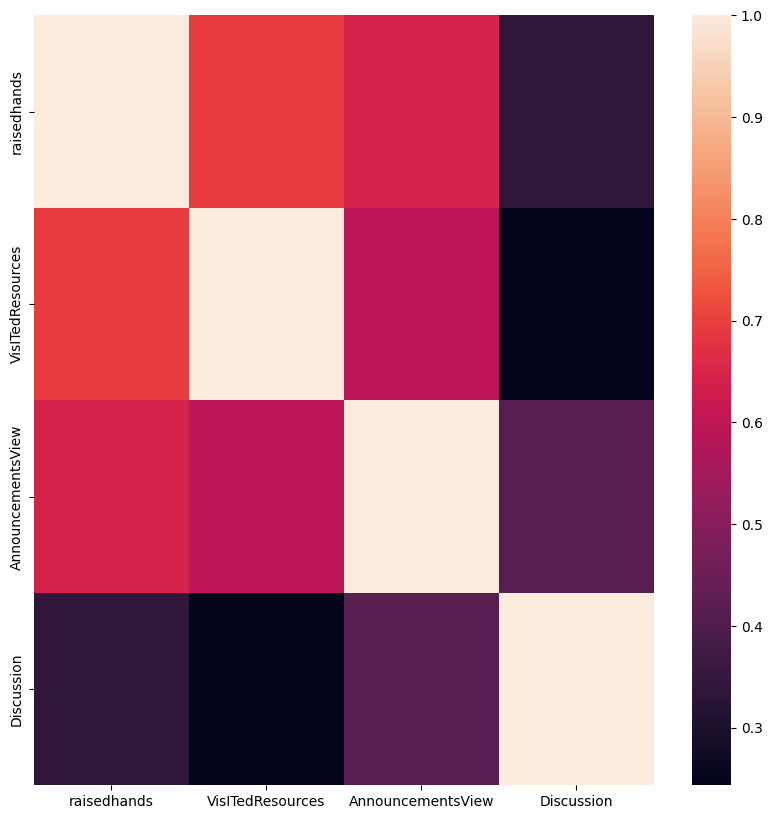

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr(numeric_only=True))

changing Categorical value to numerical value

In [12]:
dataset['gender'].unique()

array(['M', 'F'], dtype=object)

In [13]:
gender = {'M': 1,'F': 2}
dataset.gender = [gender[item] for item in dataset.gender]

In [14]:
dataset['gender'].unique()

array([1, 2], dtype=int64)

In [15]:
dataset['PlaceofBirth'].unique()

array(['KuwaIT', 'lebanon', 'Egypt', 'SaudiArabia', 'USA', 'Jordan',
       'venzuela', 'Iran', 'Tunis', 'Morocco', 'Syria', 'Iraq',
       'Palestine', 'Lybia'], dtype=object)

In [16]:
dataset['NationalITy'].unique()

array(['KW', 'lebanon', 'Egypt', 'SaudiArabia', 'USA', 'Jordan',
       'venzuela', 'Iran', 'Tunis', 'Morocco', 'Syria', 'Palestine',
       'Iraq', 'Lybia'], dtype=object)

In [17]:
dataset.drop('NationalITy', axis=1, inplace=True)

In [18]:
PlaceofBirth = {'KuwaIT': 1,'lebanon': 2,'Egypt':3,'SaudiArabia':4,'USA':5,'Quran':6,'Jordan':7,'venzuela':8,'Iran':9,'Tunis':10,'Morocco':11,'Syria':12,'Palestine':13,'Iraq':14,'Lybia':15}
dataset.PlaceofBirth = [PlaceofBirth[item] for item in dataset.PlaceofBirth]

In [19]:
dataset['PlaceofBirth'].unique()

array([ 1,  2,  3,  4,  5,  7,  8,  9, 10, 11, 12, 14, 13, 15],
      dtype=int64)

In [20]:
dataset.shape

(480, 16)

In [22]:
dataset['StageID'].unique()

array(['lowerlevel', 'MiddleSchool', 'HighSchool'], dtype=object)

In [23]:
StageID = {'lowerlevel': 1,'MiddleSchool': 2,'HighSchool':3}
dataset.StageID = [StageID[item] for item in dataset.StageID]

In [24]:
dataset['StageID'].unique()

array([1, 2, 3], dtype=int64)

In [25]:
dataset['GradeID'].unique()

array(['G-04', 'G-07', 'G-08', 'G-06', 'G-05', 'G-09', 'G-12', 'G-11',
       'G-10', 'G-02'], dtype=object)

In [26]:
GradeID = {'G-04': 4,'G-07': 7,'G-08':8,'G-06':6,'G-05':5,'G-09':9,'G-12':12,'G-11':11,'G-10':10,'G-02':2,}
dataset.GradeID = [GradeID[item] for item in dataset.GradeID]

In [27]:
dataset['GradeID'].unique()

array([ 4,  7,  8,  6,  5,  9, 12, 11, 10,  2], dtype=int64)

In [28]:
dataset['SectionID'].unique()

array(['A', 'B', 'C'], dtype=object)

In [29]:
SectionID = {'A': 1,'B': 2,'C':3}
dataset.SectionID = [SectionID[item] for item in dataset.SectionID]

In [30]:
dataset['SectionID'].unique()

array([1, 2, 3], dtype=int64)

In [31]:
dataset['Topic'].unique()

array(['IT', 'Math', 'Arabic', 'Science', 'English', 'Quran', 'Spanish',
       'French', 'History', 'Biology', 'Chemistry', 'Geology'],
      dtype=object)

In [32]:
Topic = {'IT': 1,'Math': 2,'Arabic':3,'Science':4,'English':5,'Quran':6,'Spanish':7,'French':8,'History':9,'Biology':10,'Chemistry':11,'Geology':12}
dataset.Topic = [Topic[item] for item in dataset.Topic]

In [33]:
dataset['Topic'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [34]:
dataset['Semester'].unique()

array(['F', 'S'], dtype=object)

In [35]:
dataset['Semester'].value_counts()

Semester
F    245
S    235
Name: count, dtype: int64

In [36]:
Semester = {'F': 1,'S': 2}
dataset.Semester = [Semester[item] for item in dataset.Semester]

In [37]:
dataset['Semester'].unique()

array([1, 2], dtype=int64)

In [38]:
dataset['Relation'].value_counts()

Relation
Father    283
Mum       197
Name: count, dtype: int64

In [39]:
Relation = {'Father': 0,'Mum': 1}
dataset.Relation = [Relation[item] for item in dataset.Relation]

In [40]:
dataset['Relation'].unique()

array([0, 1], dtype=int64)

In [41]:
dataset['ParentAnsweringSurvey'].unique()

array(['Yes', 'No'], dtype=object)

In [42]:
ParentAnsweringSurvey = {'Yes': 0,'No': 1}
dataset.ParentAnsweringSurvey = [ParentAnsweringSurvey[item] for item in dataset.ParentAnsweringSurvey]

In [43]:
dataset['ParentAnsweringSurvey'].unique()

array([0, 1], dtype=int64)

In [44]:
dataset['ParentschoolSatisfaction'].unique()

array(['Good', 'Bad'], dtype=object)

In [45]:
ParentschoolSatisfaction = {'Good': 0,'Bad': 1}
dataset.ParentschoolSatisfaction = [ParentschoolSatisfaction[item] for item in dataset.ParentschoolSatisfaction]

In [46]:
dataset['ParentschoolSatisfaction'].unique()

array([0, 1], dtype=int64)

In [47]:
dataset['StudentAbsenceDays'].unique()

array(['Under-7', 'Above-7'], dtype=object)

In [48]:
StudentAbsenceDays = {'Under-7': 0,'Above-7': 1}
dataset.StudentAbsenceDays = [StudentAbsenceDays[item] for item in dataset.StudentAbsenceDays]

In [49]:
dataset['StudentAbsenceDays'].unique()

array([0, 1], dtype=int64)

now checking the correation and heatmap

In [50]:
dataset.corr(numeric_only=True)

,gender,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays
gender,1.000000,0.016105,-0.017793,-0.018304,-0.054907,0.071017,-0.049156,0.195142,0.149978,0.210932,0.052139,0.124703,-0.022359,-0.093478,-0.209011
PlaceofBirth,0.016105,1.000000,-0.085201,-0.091757,-0.151550,0.491876,0.112804,0.242755,0.227104,0.291238,0.286739,0.003740,-0.074358,-0.244247,-0.051104
StageID,-0.017793,-0.085201,1.000000,0.951452,-0.296416,0.148853,0.029512,-0.034205,0.172751,0.068621,0.163666,0.161406,-0.114025,0.014272,-0.112536
GradeID,-0.018304,-0.091757,0.951452,1.000000,-0.329056,0.219534,0.076370,-0.034626,0.194382,0.078741,0.198552,0.180966,-0.116915,0.018349,-0.084896
SectionID,-0.054907,-0.151550,-0.296416,-0.329056,1.000000,-0.224213,0.046763,0.005783,-0.143862,-0.080909,-0.144955,-0.102538,0.018449,0.070405,-0.037062
Topic,0.071017,0.491876,0.148853,0.219534,-0.224213,1.000000,0.279511,0.241447,0.304377,0.378792,0.334392,-0.023449,-0.054063,-0.165179,-0.098395
Semester,-0.049156,0.112804,0.029512,0.076370,0.046763,0.279511,1.000000,0.148705,0.178358,0.173219,0.287066,0.019083,-0.023628,0.025258,-0.072462
Relation,0.195142,0.242755,-0.034205,-0.034626,0.005783,0.241447,0.148705,1.000000,0.364237,0.360240,0.339505,0.026720,-0.163811,-0.287698,-0.219687
raisedhands,0.149978,0.227104,0.172751,0.194382,-0.143862,0.304377,0.178358,0.364237,1.000000,0.691572,0.643918,0.339386,-0.316570,-0.297015,-0.463882
VisITedResources,0.210932,0.291238,0.068621,0.078741,-0.080909,0.378792,0.173219,0.360240,0.691572,1.000000,0.594500,0.243292,-0.382472,-0.363835,-0.499030


<Axes: >

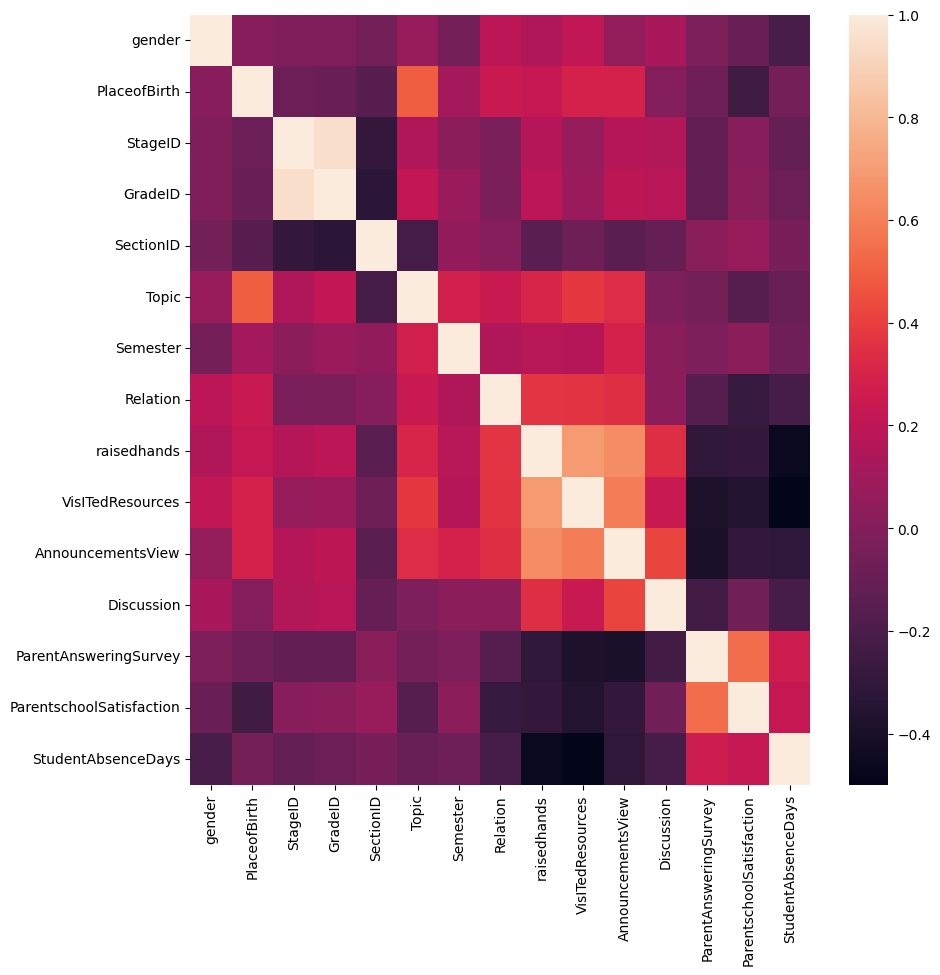

In [51]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr(numeric_only=True))

**Analysis of dataset**

Girls performed better than boys and they have better attendance than boys
Most of the students are from middle school
most of the students have enrolled for IT

LOGISTIC REGRESSION


In [97]:
X=dataset.drop('Class',axis=1)
y=dataset["Class"]

def logistic_regression(x,y,testsize):
    X=dataset.drop('Class',axis=1)
    y=dataset["Class"]
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=testsize,random_state=0)
    lr=LogisticRegression()
    lr.fit(X_train,y_train)
    pred = lr.predict(X_test)
    print("Train Result:\n================================================")
    print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
    print("_______________________________________________")
    print(f"CLASSIFICATION REPORT:\n{classification_report(y_test, pred)}")
    print("_______________________________________________")
    print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

starting with 50:50  train and test data

In [98]:
logistic_regression(X,y,0.5)

Train Result:
Accuracy Score: 67.50%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           H       0.63      0.56      0.59        68
           L       0.74      0.88      0.80        60
           M       0.66      0.63      0.65       112

    accuracy                           0.68       240
   macro avg       0.68      0.69      0.68       240
weighted avg       0.67      0.68      0.67       240

_______________________________________________
Confusion Matrix: 
 [[38  0 30]
 [ 0 53  7]
 [22 19 71]]



c:\Users\Fatma Alagroudy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


now 80:20 train and test data split

In [99]:
logistic_regression(X,y,0.2)

Train Result:
Accuracy Score: 64.58%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           H       0.53      0.64      0.58        28
           L       0.78      0.91      0.84        23
           M       0.66      0.51      0.57        45

    accuracy                           0.65        96
   macro avg       0.65      0.69      0.67        96
weighted avg       0.65      0.65      0.64        96

_______________________________________________
Confusion Matrix: 
 [[18  0 10]
 [ 0 21  2]
 [16  6 23]]



c:\Users\Fatma Alagroudy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


now 75:25 train and test data split

In [103]:
logistic_regression(X,y,0.25)

Train Result:
Accuracy Score: 70.83%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           H       0.63      0.67      0.65        33
           L       0.87      0.79      0.83        33
           M       0.67      0.69      0.68        54

    accuracy                           0.71       120
   macro avg       0.72      0.71      0.72       120
weighted avg       0.71      0.71      0.71       120

_______________________________________________
Confusion Matrix: 
 [[22  0 11]
 [ 0 26  7]
 [13  4 37]]



c:\Users\Fatma Alagroudy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**now** 70:30 train and test data split

In [102]:
logistic_regression(X,y,0.3)

Train Result:
Accuracy Score: 73.61%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           H       0.68      0.64      0.66        39
           L       0.76      0.94      0.84        34
           M       0.75      0.69      0.72        71

    accuracy                           0.74       144
   macro avg       0.73      0.76      0.74       144
weighted avg       0.73      0.74      0.73       144

_______________________________________________
Confusion Matrix: 
 [[25  0 14]
 [ 0 32  2]
 [12 10 49]]



c:\Users\Fatma Alagroudy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Accuracy of results of logistic regression with various test and train data proportion **


1.   50:50 -67.50%
2.   80:20 -64.58%
3.   75:25 -70.83%
4.   70:30 -73.61%

Among these highest accuracy is obtained in 70:30 proportion with 73.61%


**NAIVE BAYES**

In [105]:
def naive_bayes(X,y,testsize):
    X=dataset.drop('Class',axis=1)
    y=dataset["Class"]
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=testsize,random_state=0)
    X_train.shape,X_test.shape
    gaussNb=GaussianNB()
    gaussNb.fit(X_train,y_train)
    y_predict=gaussNb.predict(X_test)
    print("Train Result:\n================================================")
    print(f"Accuracy Score: {accuracy_score(y_test, y_predict) * 100:.2f}%")
    print("_______________________________________________")
    print(f"CLASSIFICATION REPORT:\n{classification_report(y_test, y_predict)}")
    print("_______________________________________________")
    print(f"Confusion Matrix: \n {confusion_matrix(y_test, y_predict)}\n")

starting with 50:50  train and test data

In [106]:
naive_bayes(X,y,0.5)

Train Result:
Accuracy Score: 70.42%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           H       0.63      0.76      0.69        68
           L       0.73      0.92      0.81        60
           M       0.75      0.55      0.64       112

    accuracy                           0.70       240
   macro avg       0.70      0.74      0.71       240
weighted avg       0.71      0.70      0.70       240

_______________________________________________
Confusion Matrix: 
 [[52  0 16]
 [ 0 55  5]
 [30 20 62]]



now splitting 80:20 train and test proportion

In [107]:
naive_bayes(X,y,0.2)

Train Result:
Accuracy Score: 70.83%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           H       0.59      0.82      0.69        28
           L       0.79      0.96      0.86        23
           M       0.79      0.51      0.62        45

    accuracy                           0.71        96
   macro avg       0.72      0.76      0.72        96
weighted avg       0.73      0.71      0.70        96

_______________________________________________
Confusion Matrix: 
 [[23  0  5]
 [ 0 22  1]
 [16  6 23]]



now splitting 75:25 train and test proportion

In [108]:
naive_bayes(X,y,0.25)

Train Result:
Accuracy Score: 70.00%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           H       0.60      0.73      0.66        33
           L       0.79      0.91      0.85        33
           M       0.71      0.56      0.62        54

    accuracy                           0.70       120
   macro avg       0.70      0.73      0.71       120
weighted avg       0.70      0.70      0.69       120

_______________________________________________
Confusion Matrix: 
 [[24  0  9]
 [ 0 30  3]
 [16  8 30]]



now splitting 70:30 train and test proportion

In [109]:
naive_bayes(X,y,0.3)

Train Result:
Accuracy Score: 71.53%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           H       0.60      0.77      0.67        39
           L       0.76      0.94      0.84        34
           M       0.79      0.58      0.67        71

    accuracy                           0.72       144
   macro avg       0.72      0.76      0.73       144
weighted avg       0.73      0.72      0.71       144

_______________________________________________
Confusion Matrix: 
 [[30  0  9]
 [ 0 32  2]
 [20 10 41]]



**Accuracy of results of Naive bayes with various test and train data proportion**


1.   50:50 -70.42%
2.   80:20 -70.83%
3.   75:25 -70.00%
4.   70:30 -71.53%

Among these highest accuracy is obtained in 70:30 proportion with 71.53%


**KNN CLASSIFICATION**

In [111]:
def KNN(X,y,testsize):
    X=dataset.drop('Class',axis=1)
    y=dataset["Class"]
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=testsize,random_state=0)
    KNN = KNeighborsClassifier()
    KNN.fit(X_train, y_train)
    KNN_predict = KNN.predict(X_test)
    print("Train Result:\n================================================")
    print(f"Accuracy Score: {accuracy_score(y_test, KNN_predict) * 100:.2f}%")
    print("_______________________________________________")
    print(f"CLASSIFICATION REPORT:\n{classification_report(y_test, KNN_predict)}")
    print("_______________________________________________")
    print(f"Confusion Matrix: \n {confusion_matrix(y_test, KNN_predict)}\n")
    
    







starting with 50:50  train and test data

In [112]:
KNN(X,y,0.5)

Train Result:
Accuracy Score: 61.25%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           H       0.57      0.51      0.54        68
           L       0.67      0.75      0.71        60
           M       0.60      0.60      0.60       112

    accuracy                           0.61       240
   macro avg       0.61      0.62      0.62       240
weighted avg       0.61      0.61      0.61       240

_______________________________________________
Confusion Matrix: 
 [[35  3 30]
 [ 0 45 15]
 [26 19 67]]



now splitting 80:20 train and test proportion

In [113]:
KNN(X,y,0.2)

Train Result:
Accuracy Score: 65.62%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           H       0.60      0.54      0.57        28
           L       0.74      0.87      0.80        23
           M       0.64      0.62      0.63        45

    accuracy                           0.66        96
   macro avg       0.66      0.68      0.67        96
weighted avg       0.65      0.66      0.65        96

_______________________________________________
Confusion Matrix: 
 [[15  0 13]
 [ 0 20  3]
 [10  7 28]]



now splitting 75:25 train and test proportion

In [114]:
KNN(X,y,0.25)

Train Result:
Accuracy Score: 62.50%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           H       0.55      0.48      0.52        33
           L       0.76      0.76      0.76        33
           M       0.59      0.63      0.61        54

    accuracy                           0.62       120
   macro avg       0.63      0.62      0.63       120
weighted avg       0.62      0.62      0.62       120

_______________________________________________
Confusion Matrix: 
 [[16  1 16]
 [ 0 25  8]
 [13  7 34]]



now splitting 70:30 train and test proportion

In [115]:
KNN(X,y,0.3)

Train Result:
Accuracy Score: 63.19%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           H       0.53      0.49      0.51        39
           L       0.71      0.79      0.75        34
           M       0.64      0.63      0.64        71

    accuracy                           0.63       144
   macro avg       0.63      0.64      0.63       144
weighted avg       0.63      0.63      0.63       144

_______________________________________________
Confusion Matrix: 
 [[19  2 18]
 [ 0 27  7]
 [17  9 45]]



**Accuracy of results of KNN Classification with various test and train data proportion**


1.   50:50 -61.25%
2.   80:20 -65.62%
3.   75:25 -62.50%
4.   70:30 -63.19%

Among these highest accuracy is obtained in 80:20 proportion with 65.62%


**ANALYSIS OF ALL THE ALGORITHMS AND BEST ALGORITHM TO USE FOR THIS DATASET**


1.   Logistic Regression=73.61%
2.   Naive Bayes=71.53%
3.   KNN Classification=65.62%

Best Algorithm with better accuracy is **Logistic Regression with accuracy 74.22%**
and Least Accuracy is **KNN Classification with 65.62%**